In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from word2number import w2n
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Hiring_without_brackets.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [4]:
df.experience=df.experience.fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
 np.floor(df.test_score.mean())

7.0

In [6]:
df.test_score=df.test_score.fillna(np.floor(df.test_score.mean()))
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [7]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [8]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [9]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model

LinearRegression()

In [11]:
# if this way is not working then follow the step line 20 (next line)

#model.fit(X_train,y_train)

In [12]:
X = df[['experience','test_score','interview_score']]
y = df['salary']

In [13]:
model.fit(df[['experience','test_score','interview_score']],df['salary'])

LinearRegression()

In [14]:
exp = float(input('Enter your experience: '))
test = float(input('Enter your test_score: '))
interview = float(input('Enter your interview_score'))
user_data = [[exp,test,interview]]
mp=np.floor(model.predict(user_data))
print('Score is : ',mp)

Enter your experience:  5
Enter your test_score:  6
Enter your interview_score 7.3


Score is :  [58608.]


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
y_pred_train = model.predict(X)
y_pred_train

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

In [16]:
import pickle

In [17]:
# To save the above code in a form of a file

In [18]:
with open ('model_pickle_Linear_Regression_convert_word_to_num_new','wb') as f:
    pickle.dump(model,f)

In [19]:
# To open the above code and just by calling the predict method, the output will come

In [20]:
with open ('model_pickle_Linear_Regression_convert_word_to_num_new','rb') as f:
    load_model_pickle=pickle.load(f)

In [21]:
load_model_pickle.predict([[5,8.9,5]])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60111.06033998])

In [22]:
import seaborn as sns

<Axes: xlabel='salary', ylabel='Count'>

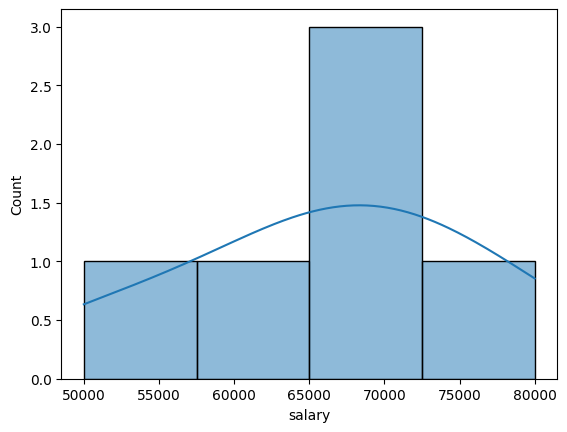

In [23]:
sns.histplot(X_test,kde=True)

<Axes: xlabel='salary', ylabel='Count'>

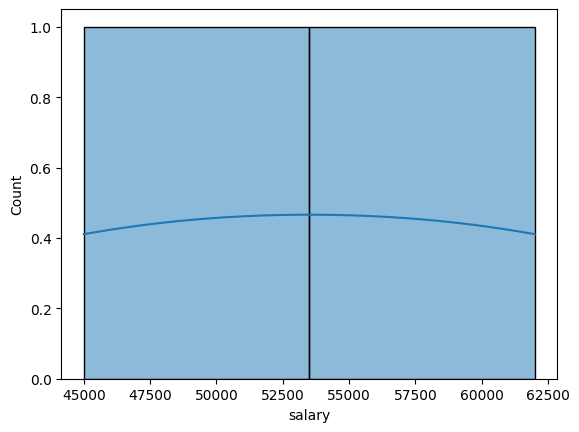

In [24]:
sns.histplot(y_test,kde=True)